In [1]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords  #pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
from nltk.stem.porter import PorterStemmer
import string

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from gensim.models import word2vec  #pip install word2vec

#from wordcloud import WordCloud  #pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from sklearn.manifold import TSNE, MDS


from textblob import TextBlob  #Sentiment Analysis - pip install textblob
from sklearn.decomposition import TruncatedSVD, NMF

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khan_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df_papers = pd.read_csv('../../../cs82_advanced_machine_learning_data/HW2/papers.csv')
print(df_papers.shape)
df_papers.head()

(7241, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# LOWER CASE
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x : x.lower())
df_papers.loc[:,'paper_text'] = df_papers.paper_text.apply(lambda x : x.lower())

#KEEP ONLY ALPHANUMERIC
regex = re.compile(r'\W+')
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x: regex.sub(' ', x))
df_papers.loc[:,'paper_text'] = df_papers.paper_text.apply(lambda x: regex.sub(' ', x))

In [4]:
#CONVERT TO BOW
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: x.split(' '))
df_papers.loc[:,'paper_text'] = df_papers['paper_text'].apply(lambda x: x.split(' '))

In [5]:
porter = PorterStemmer()
stops = set(stopwords.words("english"))
stops = stops.union(set("year"))

#REMOVE STOP WORDS
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: [word for word in x if word not in stops])
df_papers.loc[:,'paper_text'] = df_papers['paper_text'].apply(lambda x: [word for word in x if word not in stops])


In [6]:
df_papers.head(100)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,"[self, organization, associative, database, ap...",NaN,1-self-organization-of-associative-database-an...,Abstract Missing,"[767, self, organization, associative, databas..."
1,10,1987,"[mean, field, theory, layer, iv, visual, corte...",NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,"[683, mean, field, theory, layer, iv, visual, ..."
2,100,1988,"[storing, covariance, associative, long, term,...",NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,"[394, storing, covariance, associative, long, ..."
3,1000,1994,"[bayesian, query, construction, neural, networ...",NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,"[bayesian, query, construction, neural, networ..."
4,1001,1994,"[neural, network, ensembles, cross, validation...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"[neural, network, ensembles, cross, validation..."
5,1002,1994,"[using, neural, net, instantiate, deformable, ...",NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,"[u, sing, neural, net, instantiate, deformable..."
6,1003,1994,"[plasticity, mediated, competitive, learning]",NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,"[plasticity, mediated, competitive, learning, ..."
7,1004,1994,"[iceg, morphology, classification, using, anal...",NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,"[iceg, morphology, classification, using, anal..."
8,1005,1994,"[real, time, control, tokamak, plasma, using, ...",NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,"[real, time, control, tokamak, plasma, using, ..."
9,1006,1994,"[pulsestream, synapses, non, volatile, analogu...",NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,"[real, time, control, tokamak, plasma, using, ..."


In [7]:
# INCREASE WEIGHT ON THE WORDS USED IN THE TITLES BY COUNTING THEM 4 times
title_overcount_factor = 3

def build_corpus(data): 
    corpus = []
    for index, row in data.iterrows():
        title = []
        for i in range(title_overcount_factor):
            title = row['title'] + title
        content = title + row['paper_text']
        corpus.append(" ".join(content))
    return corpus

corpus = build_corpus(df_papers)


In [8]:
print(corpus[2])

storing covariance associative long term potentiation depression synaptic strengths hippocampus 394 storing covariance associative long term potentiation depression synaptic strengths hippocampus patric k stanton terrence j sejnowski department biophysics johns hopkins university baltimore md 21218 abstract modeling studies memory based neural networks selective enhancement depression synaptic strengths required ror effident storage inrormation sejnowski 1977a b kohonen 1984 bienenstock et ai 1982 sejnowski tesauro 1989 tested assumption hippocampus cortical structure brain involved long term memory brier high frequency activation excitatory synapses hippocampus produces increase synaptic strength known long term potentiation ltp buss lomo 1973 last ror many days ltp known hebbian since requires simultaneous release neurotransmitter presynaptic terminals coupled postsynaptic depolarization kelso et al 1986 malinow miller 1986 gustatrson et al 1987 however mechanism ror persistent reduc

In [28]:
# PARAMETERS FOR TFIDF
min_ngram = 2
max_ngram = 2

max_df = 0.90
min_df = 2
max_features = 500

vectorizer = TfidfVectorizer(ngram_range=(min_ngram, max_ngram), max_features = max_features, max_df = max_df)
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print((vectorizer.get_feature_names()))
#print(X.has_sorted_indices)

(7241, 500)
['00 00', '10 000', '10 10', '10 100', '10 11', '10 12', '10 15', '10 20', '100 100', '100 150', '100 200', '11 12', '12 13', '13 14', '14 15', '15 10', '15 16', '15 20', '16 17', '20 10', '20 20', '20 25', '20 30', '20 40', '30 40', '40 50', '40 60', '50 100', '50 50', '60 80', '80 100', 'ac uk', 'active learning', 'advances neural', 'al 2015', 'al 2016', 'algorithm based', 'allows us', 'also used', 'analysis machine', 'annals statistics', 'annual conference', 'approximate inference', 'approximation error', 'arg max', 'arg min', 'artificial intelligence', 'artificial neural', 'arxiv preprint', 'back propagation', 'based methods', 'basis function', 'basis functions', 'bayesian inference', 'bayesian networks', 'belief propagation', 'best knowledge', 'better performance', 'binary classification', 'c1 c2', 'cambridge university', 'chain monte', 'cifar 10', 'classification accuracy', 'closed form', 'closely related', 'commonly used', 'component analysis', 'computational complex

In [29]:
# SOURCE : https://www.kaggle.com/rjhere23/nips-papers-visualized-with-nmf-and-t-sne
# FIND TOP TOPICS
n_topics = 5
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
nmf = NMF(n_components=n_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(X)

print("Topics found via NMF:")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
machine learning support vector loss function training set low rank optimization problem upper bound lower bound xi yi international conference training data data sets gradient descent objective function semi supervised convex optimization data set feature space vector machines high dimensional

Topic #1:
neural network neural networks hidden units hidden layer training set back propagation recurrent neural speech recognition input output artificial neural test set shown figure training data feed forward fully connected neural net network architecture neural computation hidden unit convolutional neural

Topic #2:
reinforcement learning value function optimal policy state action state space markov decision dynamic programming reward function decision processes time step function approximation policy gradient st st machine learning time steps decision making model based artificial intelligence optimal value transition probabilities

Topic #3:
et al al 201

In [30]:
# CONVERT TFIDF RESULTS TO PANDAS DATA FRAME
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df_tfidf.shape)
# ADD THE YEAR COLUMN TO THE DATAFRAME
df_tfidf['year'] = df_papers['year']
df_tfidf['count'] = 1
print(df_tfidf.shape)


df_tfidf.head()



(7241, 500)
(7241, 502)


,00 00,10 000,10 10,10 100,10 11,10 12,10 15,10 20,100 100,100 150,...,xk xk,xt xt,xt yt,yi xi,yi yi,york ny,yt yt,zero mean,year,count
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1987,1
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1987,1
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1988,1
3,0.0,0.059816,0.0,0.0,0.0,0.0,0.050607,0.000000,0.0,0.0,...,0.0,0.12448,0.0,0.059583,0.0,0.0,0.0,0.051862,1994,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037448,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1994,1


In [31]:
#GROUP BY YEAR

#GET THE NUMBER OF PAPERS FOR EACH YEAR 
counts = df_tfidf.groupby(['year']).agg(['count'])['count']

#TAKE THE MEAN IDF SCORE FOR EACH FEATURE
df_tfidf_year = df_tfidf.groupby(['year']).mean()

#ADD THE COUNT COLUMN FOR EACH YEAR FOR FUTURE USE
df_tfidf_year['count'] = counts
df_tfidf_year.head(32)


,00 00,10 000,10 10,10 100,10 11,10 12,10 15,10 20,100 100,100 150,...,xj xi,xk xk,xt xt,xt yt,yi xi,yi yi,york ny,yt yt,zero mean,count
year,,,,,,,,,,,,,,,,,,,,,
1987,0.012715,0.002905,0.012236,0.003752,0.016262,0.003609,0.003548,0.010973,0.009355,0.000765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004498,0.004513,0.000000,0.006718,90
1988,0.011230,0.003657,0.034808,0.009063,0.010647,0.008590,0.006937,0.007127,0.004319,0.002524,...,0.003207,0.000000,0.000000,0.002045,0.000371,0.002838,0.002683,0.000000,0.005481,94
1989,0.004917,0.007659,0.015940,0.001277,0.003823,0.002950,0.004294,0.010806,0.002099,0.006780,...,0.000831,0.000000,0.000874,0.000000,0.000465,0.000000,0.004005,0.000000,0.003878,101
1990,0.025244,0.003289,0.013621,0.004226,0.006840,0.000497,0.004851,0.014613,0.002722,0.002734,...,0.000000,0.001566,0.000596,0.000000,0.000000,0.001868,0.001099,0.000917,0.003278,143
1991,0.011820,0.007325,0.020312,0.005943,0.003551,0.001111,0.006865,0.011170,0.011476,0.003540,...,0.000660,0.001016,0.004993,0.000000,0.003556,0.000581,0.001838,0.000000,0.006173,144
1992,0.020449,0.004403,0.003404,0.004038,0.003843,0.002448,0.004190,0.007104,0.008920,0.002614,...,0.000653,0.000000,0.002397,0.000633,0.001763,0.001850,0.005097,0.001573,0.006659,127
1993,0.017507,0.002524,0.005719,0.003707,0.002778,0.002867,0.005506,0.010506,0.005482,0.005815,...,0.000000,0.001605,0.001044,0.000355,0.001830,0.001852,0.009653,0.001617,0.008573,158
1994,0.013811,0.007440,0.011806,0.003814,0.006353,0.006007,0.006582,0.010370,0.006368,0.006783,...,0.001293,0.000000,0.003531,0.001622,0.001935,0.004051,0.001749,0.002402,0.005994,140
1995,0.005296,0.002194,0.013385,0.003856,0.002912,0.012969,0.003820,0.009005,0.008176,0.005595,...,0.000000,0.000609,0.002334,0.001874,0.000761,0.000000,0.003902,0.002374,0.005685,152


In [32]:
# NORMALIZE FOR THE GROWTH IN THE NUMBER OF PAPERS IN THE CONFERENCE
#total_papers = df_tfidf_year['count'].sum()
#print(total_papers)

#for year in df_tfidf_year.index:
#     df_tfidf_year.loc[year,:] = total_papers/df_tfidf_year.loc[year,:]['count'] * df_tfidf_year.loc[year,:]


#RESTORE THE COUNTS COLUMN
#df_tfidf_year['count'] = counts
#df_tfidf_year.head(32)

Int64Index([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='year')
51


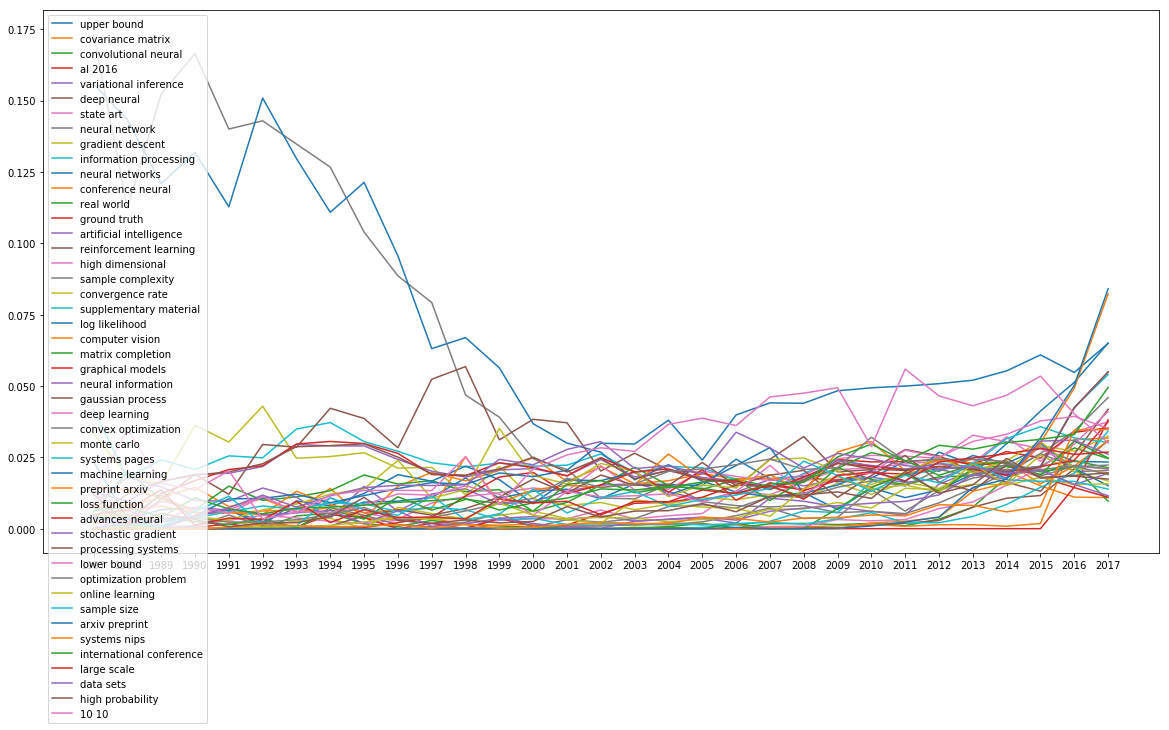

In [71]:
topN_topics = 25
min_year = 2013
max_year = 2017


# ITERATE THROUGH EACH YEAR AND PICK THE TOP (top_n) TOPICS FROM EACH YEAR TO PLOT
years = df_tfidf_year.index
print(years)
topics  = set()
for year in years:
        if (year >= min_year) & (year <=max_year):
            tfidf_sorted = df_tfidf_year.T.sort_values(by=[year], ascending=False)
            #print(tfidf_sorted.head(20))
            topics = topics.union(set(tfidf_sorted.index[:topN_topics]))

print(len(topics))

# REMOVE TOPICS THAT ARE KNOWN TO BE NOT RELATED TO MACHINE LEARNING
remove_set = set(["using", "et al", "count", "based", "via", "semi", "online", 
                  "large", "multi", "analysis", "data", "stochastic", "log log", "low rank"])

# FINAL LIST OF TOPICS TO PLOT
topics = topics.difference(remove_set)

plt.figure(figsize=(20,10))
for topic in topics:
    plt.plot(df_tfidf_year.index, df_tfidf_year.loc[:,topic])
plt.xticks(df_tfidf_year.index)
plt.legend(loc = 'upper left')


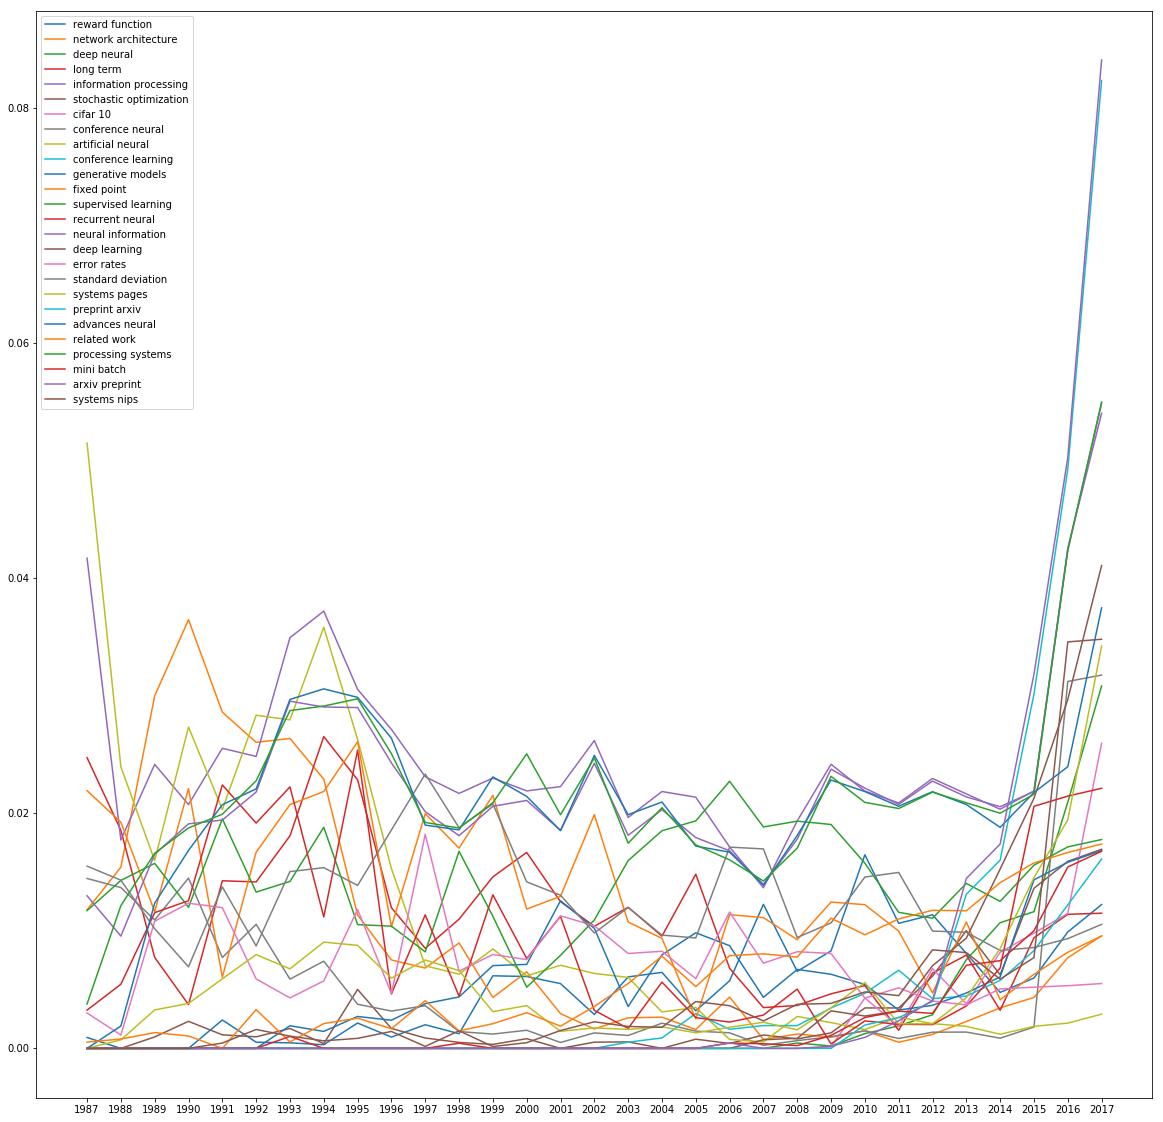

In [72]:
topics = set()
for column in df_tfidf_year.columns:
    #print(df_tfidf_year.loc[2017,column])
    #print(df_tfidf_year.loc[2016,column]) 
    if df_tfidf_year.loc[2017,column] > df_tfidf_year.loc[2016, column] > df_tfidf_year.loc[2015, column] >df_tfidf_year.loc[2014, column] :
         #print("2017")
         #print(df_tfidf_year.loc[2017,column])
         #print(df_tfidf_year.loc[2016,column])
         #print(df_tfidf_year.loc[2015,column])
         #print(column)
         topics.add(column)
        
        
# REMOVE TOPICS THAT ARE KNOWN TO BE NOT RELATED TO MACHINE LEARNING
remove_set = set(["using", "et al", "count", "based", "via", "semi", "online", "neural networks", "neural network", "related work" 
                  "large", "multi", "analysis", "data", "stochastic", "log log", "low rank", "end end", "international conference"])
        
# FINAL LIST OF TOPICS TO PLOT
topics = topics.difference(remove_set)

#topics = set(["computer vision", "deep learning", "neural networks", "value function", "pattern recognition",
#               "reinforcement learning" ,"information processing"])

#print(topics)
plt.figure(figsize=(20,20))
for topic in topics:
    plt.plot(df_tfidf_year.index, df_tfidf_year.loc[:,topic])
plt.xticks(df_tfidf_year.index)
plt.legend(loc = 'upper left')